##1. K-평균 실행 및 결과 해석 정답

In [ ]:
# 2. KMeans 모델 객체 생성 및 학습/예측을 한 번에 수행
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
cluster_labels = kmeans.fit_predict(X) # (fit_predict)

# 4. 각 클러스터에 속하는 데이터 포인트의 개수를 세어 출력합니다.
cluster_counts = df_result['Cluster'].value_counts() # (value_counts())

#2. 엘보우 방법으로 최적의 $K$ 찾기 정답

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # (inertia_) # (이너셔 속성으로 리스트에 추가)

In [ ]:
#예시 결과창
--- K 값에 따른 이너셔 변화 ---
K=1: 1807.59
K=2: 572.76
K=3: 114.71
K=4: 88.04
K=5: 71.91
K=6: 61.16

최적 K: 3

근거: $K=1 \to K=2 \to K=3$으로 갈 때 이너셔 감소 폭이 매우 크지만, **$K=4$**부터는 감소 폭이 급격히 줄어들면서 그래프가 완만해집니다. 이는 $K=3$에서 이미 데이터의 **내재된 구조(3개의 군집)**를 잘 포착했으며, 이후 $K$를 늘리는 것은 효율적인 이득이 적다는 의미입니다.

#3. 평균이동

In [ ]:
# 3-1
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 156)

meanshift=MeanShift(bandwidth = 1.0)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

In [ ]:
#3-2
from sklearn.cluster import estimate_bandwidth
import pandas as pd

best_bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(best_bandwidth,3))

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

In [ ]:
#3-3
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label] )

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$'%label)

plt.show()

# 4. GMM

In [ ]:
#4-1
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

#5. DBSCAN

5-1 : epsilon( 입실론 주변 영역. 개별 데이터 중심으로, 입실론의 반경을 가지는원형영역), min points(최소 데이터 개수. 개별 데이터의 입실론 영역에 포함되는 다른 데이터들 개수)

5-2 : 입실론 영역 내에 자기 포함 최소 데이터 개수 이상의 다른 데이터 가지고 있을 경우 해당되는 데이터

In [ ]:
#5-3
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3, min_samples = 7,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

# 6 추가 개념, 고객 세그멘테이션

데이터 셋 다운로드: https://archive.ics.uci.edu/dataset/352/online+retail

In [ ]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/OnlineRetail.xlsx'

retail_df = pd.read_excel(io=file_path)
retail_df.head(3)

Mounted at /content/drive


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


 ## Q1. 전처리
   불린 인덱싱을 사용해 Quantity > 0, UnitPrice > 0, CustomerID 가 Not Null인 값만 필터링하는 코드를 작성하시오

In [ ]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

## Q2. RFM 기반 데이터 가공

### Q2-1. RFM 기법에 대해 간단히 서술하시오.

* R: Recently, 가장 최근 상품 구입 일부터 오늘까지의 기간
* F: Frequency, 상품 구매 횟수
* M: Monetary Value, 총 구매 금액


In [ ]:
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

import datetime as dt
cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


 ## Q3. Agglomerative Clustering (병합 군집)


### Q3-1. Agglomerative Clustering(병합 군집)의 linkage 옵션 4가지에 대해 간단히 서술하시오.
(발표 자료를 참고해서 작성해주시면 됩니다)

### Q3-2. `AgglomerativeClustering`를 수행하여 평균 실루엣 계수인 실루엣 스코어를 구하시오

<조건>
* `n_clusters=3`
* `X_features_scaled` 데이터를 `fit_predict`하여 `labels` 생성

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

agg_model = AgglomerativeClustering(n_clusters=3)
labels = agg_model.fit_predict(X_features_scaled)
score = silhouette_score(X_features_scaled, labels)
print(f"AgglomerativeClustering (k=3) 실루엣 스코어: {score:.3f}")

AgglomerativeClustering (k=3) 실루엣 스코어: 0.571


시각화를 위한 함수 정의

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def visualize_cluster_results_pca(cluster_lists, X_features):
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = AgglomerativeClustering(n_clusters = n_cluster)
        cluster_labels = clusterer.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(cluster_labels)
        markers=['o', 's', '^', 'x', '*']


        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)

            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=markers[label % len(markers)], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

/tmp/ipython-input-1733838250.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


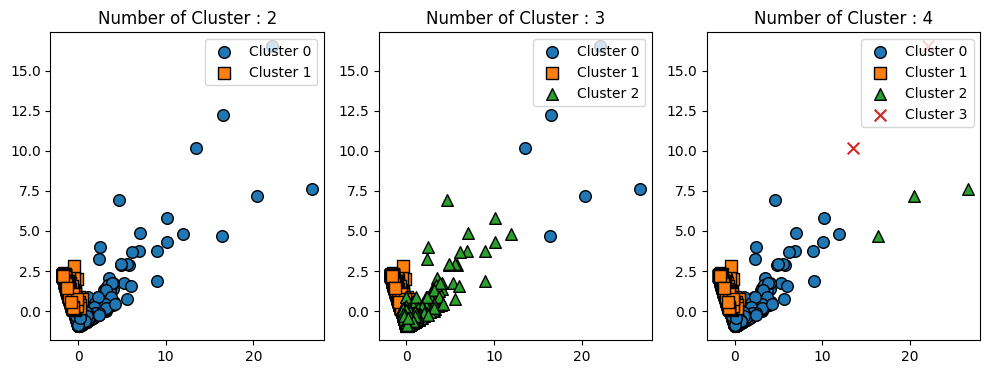

In [ ]:
# 코드를 실행해주세요
visualize_cluster_results_pca(cluster_k_list, X_features_scaled)

### Q3-3. 데이터 세트의 왜곡 정도를 낮추기 위해 데이터 변환

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_log_scaled = StandardScaler().fit_transform(X_features)

agg_model = AgglomerativeClustering(n_clusters=3)
labels = agg_model.fit_predict(X_features_log_scaled)
score = silhouette_score(X_features_log_scaled, labels)

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_log_scaled,labels)))


실루엣 스코어는 : 0.263


/tmp/ipython-input-1733838250.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


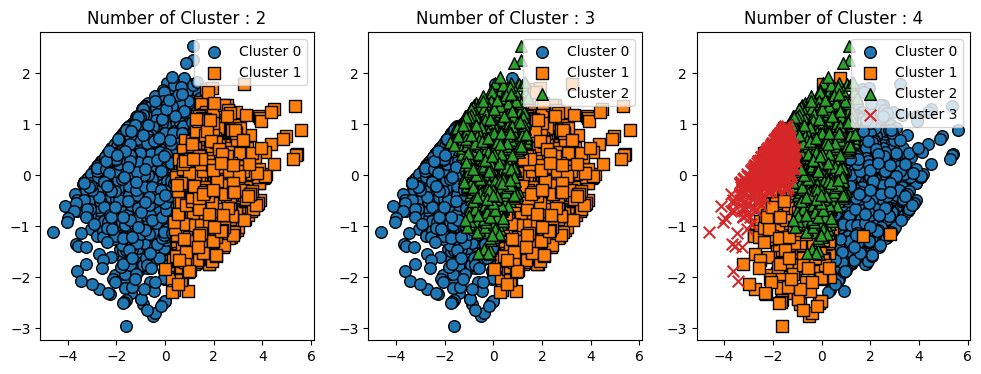

In [ ]:
# 코드를 실행해주세요

visualize_cluster_results_pca(cluster_k_list, X_features_log_scaled)